# Daten laden und Parsen

In [2]:
import csv
import pandas
import matplotlib
import matplotlib.pyplot as plt

data = pandas.read_csv('chronicgdaytotpop.csv', sep=',', encoding='utf-8')

data.dtypes

Country          object
Survey           object
Pop Class        object
Foodex L1        object
Metrics          object
Nr Subjetcs     float64
Nr Consumers    float64
Mean            float64
STD             float64
P5              float64
P10             float64
Median           object
P95              object
P97.5            object
P99              object
Comment          object
dtype: object

# A1: Lebenmittelverbrauch pro Bevölkerungsgruppe in einem Land

Pop Class  Nr Subjetcs  Nr Consumers      Mean       STD       P5  \
0     Adolescents        237.0        153.95   88.6060   77.7295   6.2255   
1          Adults        308.0        183.45  150.6720  132.5530  16.0650   
2         Elderly         67.0         40.80  128.1900  104.8030  19.8325   
3  Other children        128.0         90.90   98.3220   73.6095  11.3065   
4    Very elderly         25.0         15.30  150.4905  109.1550  28.4075   

       P10  
0  13.5345  
1  30.6250  
2  22.1250  
3  20.4550  
4  32.9485  


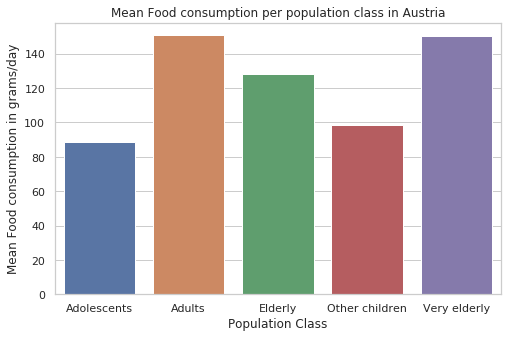

In [55]:
country = 'Austria'
# summieren der Daten pro Land und Bevölkerungsgruppe
# Ziel: dictionary mit Schlüssel/Wert Paaren der Form Bevölkerungsgruppe/Verbrauch

## !!! set as_index=False
food_consumption_by_pop_class = data[data.Country == country].groupby(by=['Pop Class'], as_index=False).mean()

print(food_consumption_by_pop_class)

import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

plot = sns.barplot(x='Pop Class', y='Mean', data=food_consumption_by_pop_class)
plot.set_title("Mean Food consumption per population class in {}".format(country))
plot.set(xlabel='Population Class', ylabel='Mean Food consumption in grams/day')
plt.show(plot)

#ab hier code zum plotten
#x_labels = list(food_consumption_by_pop_class.keys())
#x_ticks = list(range(len(x_labels)))
#bar_width = 0.35 
#fig, ax = plt.subplots()
#bars = ax.bar(x_ticks, list(food_consumption_by_pop_class.values()), bar_width)

#plt.rcParams["figure.figsize"] = (5,5)
#ax.set_xlabel('Population class')
#ax.set_ylabel('Mean Food consumption in grams/day')
#ax.set_xticks(x_ticks)
#ax.set_xticklabels(x_labels)
#plt.show()




# A2: Lebenmittelverbrauch nach Kategorie und Land

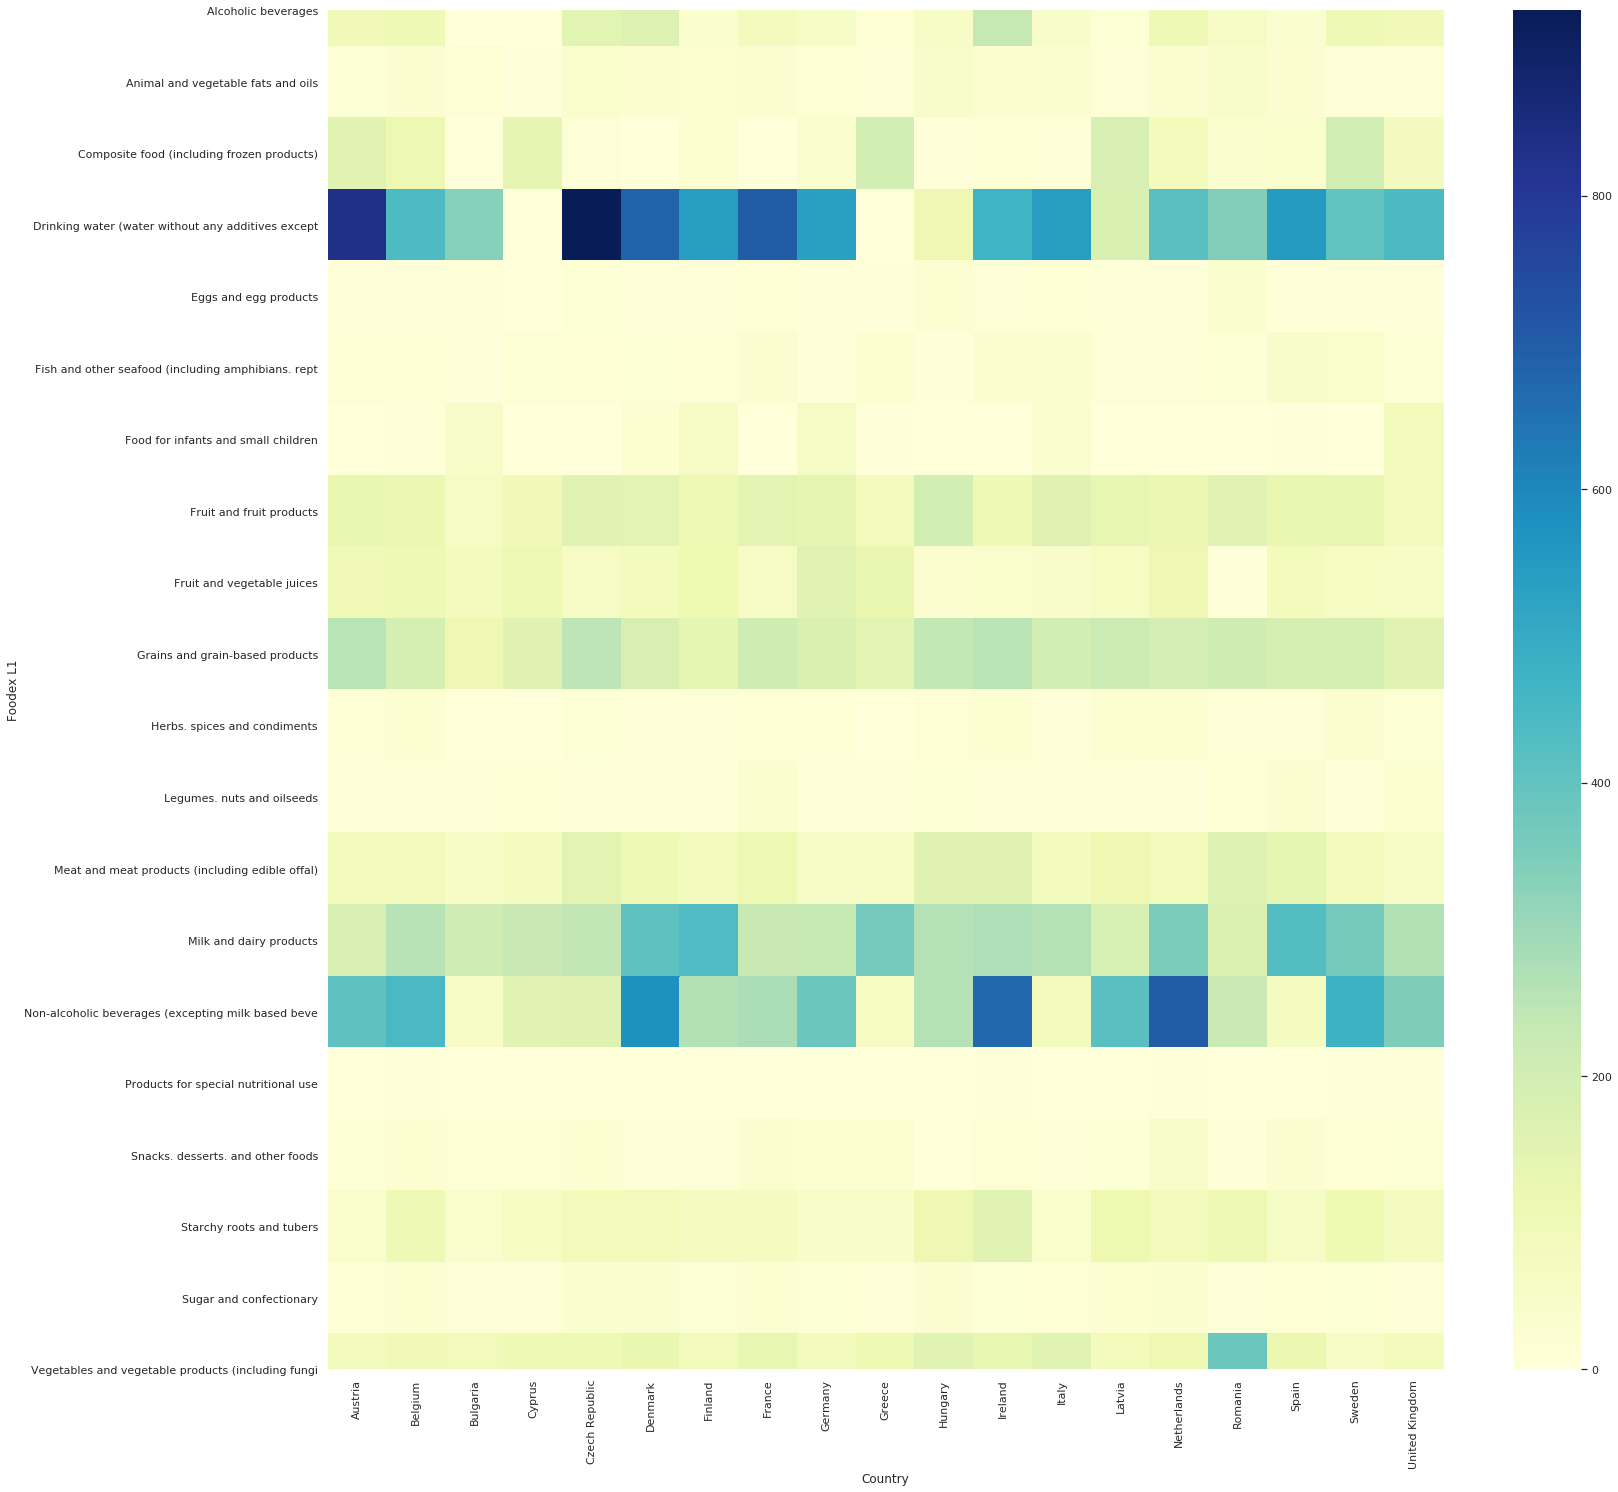

'def heatmap(data, row_labels, col_labels, ax=None,\n            cbar_kw={}, cbarlabel="", **kwargs):\n    if not ax:\n        ax = plt.gca()\n    im = ax.imshow(data, **kwargs)\n    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)\n    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",fontsize=16)\n    \n    ax.set_xticks(range(len(col_labels)))\n    ax.set_yticks(range(len(row_labels)))\n    ax.set_xticklabels(col_labels,fontsize=16)\n    ax.set_yticklabels(row_labels,fontsize=16)\n\n    # Let the horizontal axes labeling appear on top.\n    ax.tick_params(top=True, bottom=False,\n                   labeltop=True, labelbottom=False)\n\n    # Rotate the tick labels and set their alignment.\n    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",\n             rotation_mode="anchor")\n\n    # Turn spines off and create white grid.\n    for edge, spine in ax.spines.items():\n        spine.set_visible(False)\n    ax.set_xticks([x-.5 for x in range(len(col_labels)

In [58]:
# sammeln der durchschnittlichen Verbräuche pro Lebensmittelkategorie für jedes Land
# Ziel: dictionary mit Schlüssel/Wert Paaren der Form:  Land/{Lebensmittelkategorie/Durchschnitt Verbrauch}

food_categories_by_country = data.filter(['Country', 'Foodex L1','Mean']).groupby(['Country', 'Foodex L1']).mean()
food_categories_by_country = food_categories_by_country.pivot_table(values='Mean', columns=['Country'], index='Foodex L1')

import seaborn as sns

plt.rcParams["figure.figsize"] = (25,25)
heatmap =sns.heatmap(food_categories_by_country, cmap="YlGnBu")
plt.show(heatmap)

#ab hier code zum plotten ####
'''def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",fontsize=16)
    
    ax.set_xticks(range(len(col_labels)))
    ax.set_yticks(range(len(row_labels)))
    ax.set_xticklabels(col_labels,fontsize=16)
    ax.set_yticklabels(row_labels,fontsize=16)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks([x-.5 for x in range(len(col_labels))], minor=True)
    ax.set_yticks([x-.5 for x in range(len(row_labels))], minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            text = ax.text(j, i, round(data[i][j],1),
                           ha="center", va="center", color="black", fontsize=16)

    return im, cbar

if len(food_categories_by_country)>0:
    countries = list(food_categories_by_country.keys())
    categories = list(next(iter(food_categories_by_country.values())))

    plot_data = [list(x.values()) for x in food_categories_by_country.values()]

    fig, ax = plt.subplots(1,1,figsize=(25,25))
    im, cbar = heatmap(plot_data, countries, categories, ax=ax,
                       cmap="Spectral", cbarlabel="consumption [grams/day]")
    fig.tight_layout()
    plt.show()
'''